In [12]:
#import pandas as pd
#DF = pd.read_csv ('EPA_SmartLocationDatabase_V3_Jan_2021_Final 1.csv')
#DF1 = DF.groupby('NatWalkInd Category', group_keys=False).apply(lambda x: x.sample(10000))
#DF1.to_csv('EPA_SmartLocationDatabase_V3_Jan_2021_Final 2.csv')

In [14]:
#import pandas as pd
#DF = pd.read_csv ('EPA_SmartLocationDatabase_V3_Jan_2021_Final 1.csv')
#DF1 = DF.groupby('NatWalkInd Category', group_keys=False).apply(lambda x: x.sample(10000))

In [196]:
import pandas as pd
DF = pd.read_csv('EPA_SmartLocationDatabase_V3_Jan_2021_Final 1.csv')
table = pd.pivot_table(DF,values = ['CBSA_POP','CBSA_EMP','CBSA_WRK','Ac_Total','CountHU','AutoOwn0'], index =['CBSA','CBSA_Name'], aggfunc={'CBSA_POP':"mean",'CBSA_EMP':'mean','CBSA_WRK':"mean",'Ac_Total':"sum",'CountHU':"sum",'AutoOwn0':"sum"})
table

,,Ac_Total,AutoOwn0,CBSA_EMP,CBSA_POP,CBSA_WRK,CountHU
CBSA,CBSA_Name,,,,,,
10100.0,"Aberdeen, SD",1.844450e+06,1268,21853,42780,844,19998.0
10140.0,"Aberdeen, WA",1.423075e+06,1975,20644,71967,28036,36005.0
10180.0,"Abilene, TX",1.764893e+06,3215,63094,170009,66697,71259.0
10220.0,"Ada, OK",4.641603e+05,799,18472,38358,15727,16826.0
10300.0,"Adrian, MI",4.872871e+05,2052,25446,98474,39531,43751.0
...,...,...,...,...,...,...,...
49660.0,"Youngstown-Warren-Boardman, OH-PA",1.116337e+06,19021,211890,545488,227898,259354.0
49700.0,"Yuba City, CA",8.015328e+05,3786,44703,171365,65478,62685.0
49740.0,"Yuma, AZ",3.532054e+06,4328,57963,207829,62847,91685.0


In [169]:
table.to_csv('CBSA wise demographics_new.csv')

In [170]:
from sklearn.cluster import DBSCAN
import numpy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Apply Scalar for standardization
table_scaled = pd.DataFrame(scaler.fit_transform(table), columns=['Ac_Total', 'CBSA_EMP','CBSA_POP','CBSA_WRK','CountHU','AutoOwn0'])
table_scaled.describe()

,Ac_Total,CBSA_EMP,CBSA_POP,CBSA_WRK,CountHU,AutoOwn0
count,9.380000e+02,9.380000e+02,9.380000e+02,9.380000e+02,9.380000e+02,9.380000e+02
mean,4.166295e-17,3.787541e-18,2.272525e-17,1.136262e-17,-1.893771e-17,2.651279e-17
std,1.000533e+00,1.000533e+00,1.000533e+00,1.000533e+00,1.000533e+00,1.000533e+00
min,-7.674092e-01,-1.423742e-01,-2.823991e-01,-2.898224e-01,-2.879583e-01,-3.099757e-01
25%,-5.348220e-01,-1.313592e-01,-2.536418e-01,-2.652493e-01,-2.554095e-01,-2.779303e-01
50%,-3.584614e-01,-1.195505e-01,-2.295509e-01,-2.327430e-01,-2.301894e-01,-2.375406e-01
75%,1.410888e-01,-7.966245e-02,-1.355853e-01,-1.336694e-01,-1.354584e-01,-1.269946e-01
max,1.023165e+01,2.833001e+01,1.762089e+01,1.744453e+01,1.777099e+01,1.770257e+01


In [171]:
dbscanModel = DBSCAN(eps=2, min_samples=15) #Initiate DBSCAN Model
dbscanModel = dbscanModel.fit(table_scaled) #Fit DBSCAN

In [172]:
# Clustering using DBSCAN to detect outliers
Outliers = dbscanModel.fit_predict(table_scaled)
Outliers = pd.Categorical(Outliers)
Outliers

[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 938
Categories (2, int64): [-1, 0]

In [173]:
table_scaled[Outliers == -1].shape

(19, 6)

Text(0, 0.5, 'Scaled price')

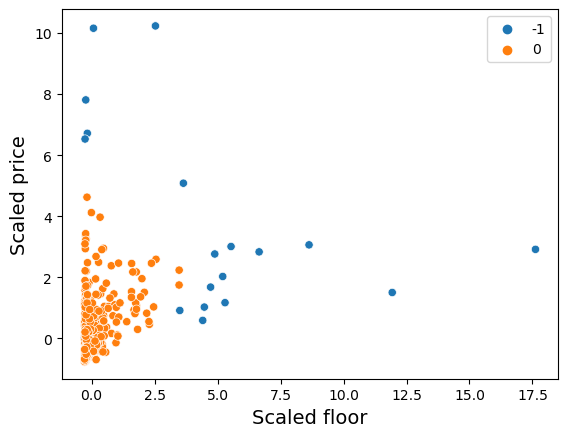

In [174]:
p = sns.scatterplot(data=table_scaled, x='CBSA_POP', y='Ac_Total',hue=Outliers)
p.set_xlabel('Scaled floor', fontsize=14)
p.set_ylabel('Scaled price', fontsize=14)

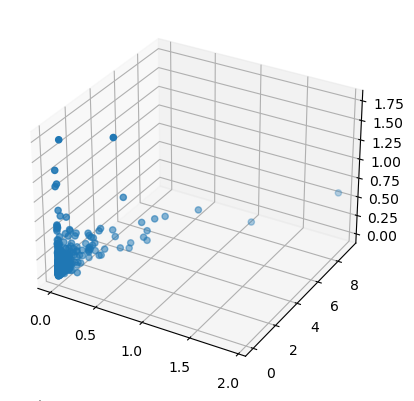

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

ax = plt.axes(projection='3d')
x = table['CBSA_POP']
y = table['CBSA_EMP']
z = table['Ac_Total']
ax.scatter3D(x,y,z)
plt.show()


In [176]:
#Fitting Knnmodel for values excluding outliers
final_data = table[Outliers != -1]
kmModel = KMeans(n_clusters=3)
kmModel = kmModel.fit(final_data)
centroids = kmModel.cluster_centers_
centroids[1]
clusters = kmModel.fit_predict(final_data[['Ac_Total','CBSA_POP','CBSA_EMP','CBSA_WRK','CountHU','AutoOwn0']])

C:\Users\sarat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sarat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [177]:
final_data.tail()

,,Ac_Total,AutoOwn0,CBSA_EMP,CBSA_POP,CBSA_WRK,CountHU
CBSA,CBSA_Name,,,,,,
49660.0,"Youngstown-Warren-Boardman, OH-PA",1.116337e+06,19021,211890,545488,227898,259354.0
49700.0,"Yuba City, CA",8.015328e+05,3786,44703,171365,65478,62685.0
49740.0,"Yuma, AZ",3.532054e+06,4328,57963,207829,62847,91685.0
49780.0,"Zanesville, OH",4.304457e+05,2527,32749,86076,34914,37946.0
49820.0,"Zapata, TX",6.771151e+05,348,1979,14369,3836,6388.0


In [179]:
clusters.shape
df = pd.DataFrame(clusters[0:919])
df.describe()

,0
count,919.000000
mean,1.507073
std,0.825588
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [180]:
#Adding clusters column to earlier dataframe, index defined by earlier DF
final_data['Predicted_Cluster'] = pd.Series(clusters, index=final_data.index)

C:\Users\sarat\AppData\Local\Temp\ipykernel_30272\2893872553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Predicted_Cluster'] = pd.Series(clusters, index=final_data.index)


In [181]:
final_data.head()

,,Ac_Total,AutoOwn0,CBSA_EMP,CBSA_POP,CBSA_WRK,CountHU,Predicted_Cluster
CBSA,CBSA_Name,,,,,,,
10100.0,"Aberdeen, SD",1.844450e+06,1268,21853,42780,844,19998.0,0
10140.0,"Aberdeen, WA",1.423075e+06,1975,20644,71967,28036,36005.0,0
10180.0,"Abilene, TX",1.764893e+06,3215,63094,170009,66697,71259.0,0
10220.0,"Ada, OK",4.641603e+05,799,18472,38358,15727,16826.0,2
10300.0,"Adrian, MI",4.872871e+05,2052,25446,98474,39531,43751.0,2


In [182]:
final_data.tail()

,,Ac_Total,AutoOwn0,CBSA_EMP,CBSA_POP,CBSA_WRK,CountHU,Predicted_Cluster
CBSA,CBSA_Name,,,,,,,
49660.0,"Youngstown-Warren-Boardman, OH-PA",1.116337e+06,19021,211890,545488,227898,259354.0,2
49700.0,"Yuba City, CA",8.015328e+05,3786,44703,171365,65478,62685.0,2
49740.0,"Yuma, AZ",3.532054e+06,4328,57963,207829,62847,91685.0,0
49780.0,"Zanesville, OH",4.304457e+05,2527,32749,86076,34914,37946.0,2
49820.0,"Zapata, TX",6.771151e+05,348,1979,14369,3836,6388.0,2


In [183]:
final_dataframe = pd.DataFrame(final_data.to_records())
final_dataframe.tail()

,CBSA,CBSA_Name,Ac_Total,AutoOwn0,CBSA_EMP,CBSA_POP,CBSA_WRK,CountHU,Predicted_Cluster
914,49660.0,"Youngstown-Warren-Boardman, OH-PA",1.116337e+06,19021,211890,545488,227898,259354.0,2
915,49700.0,"Yuba City, CA",8.015328e+05,3786,44703,171365,65478,62685.0,2
916,49740.0,"Yuma, AZ",3.532054e+06,4328,57963,207829,62847,91685.0,0
917,49780.0,"Zanesville, OH",4.304457e+05,2527,32749,86076,34914,37946.0,2
918,49820.0,"Zapata, TX",6.771151e+05,348,1979,14369,3836,6388.0,2


In [184]:
walkscore_df = DF[['CBSA','CBSA_Name','TotPop','NatWalkInd','D2A_Ranked','D2B_Ranked','D3B_Ranked','D4A_Ranked']]

In [186]:
walkscore_df['natwalkInd_sp'] = walkscore_df['NatWalkInd'] * walkscore_df['TotPop']
walkscore_df['D2A_Ranked_sp'] = walkscore_df['D2A_Ranked'] * walkscore_df['TotPop']
walkscore_df['D2B_Ranked_sp'] = walkscore_df['D2B_Ranked'] * walkscore_df['TotPop']
walkscore_df['D3B_Ranked_sp'] = walkscore_df['D3B_Ranked'] * walkscore_df['TotPop']
walkscore_df['D4A_Ranked_sp'] = walkscore_df['D4A_Ranked'] * walkscore_df['TotPop']

C:\Users\sarat\AppData\Local\Temp\ipykernel_30272\2025977354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walkscore_df['natwalkInd_sp'] = walkscore_df['NatWalkInd'] * walkscore_df['TotPop']
C:\Users\sarat\AppData\Local\Temp\ipykernel_30272\2025977354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walkscore_df['D2A_Ranked_sp'] = walkscore_df['D2A_Ranked'] * walkscore_df['TotPop']
C:\Users\sarat\AppData\Local\Temp\ipykernel_30272\2025977354.py:3: SettingWithCopyWarning: 
A value is trying to be se

In [187]:
walkscore_df.head()

,CBSA,CBSA_Name,TotPop,NatWalkInd,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,natwalkInd_sp,D2A_Ranked_sp,D2B_Ranked_sp,D3B_Ranked_sp,D4A_Ranked_sp
0,19100.0,"Dallas-Fort Worth-Arlington, TX",1202,14.000000,6,14,15,17,16828.000000,7212,16828,18030,20434
1,19100.0,"Dallas-Fort Worth-Arlington, TX",710,10.833333,3,10,12,14,7691.666664,2130,7100,8520,9940
2,19100.0,"Dallas-Fort Worth-Arlington, TX",737,8.333333,1,1,7,17,6141.666666,737,737,5159,12529
3,19100.0,"Dallas-Fort Worth-Arlington, TX",904,15.666667,16,10,17,17,14162.666670,14464,9040,15368,15368
4,19100.0,"Dallas-Fort Worth-Arlington, TX",948,10.166667,4,7,11,14,9638.000003,3792,6636,10428,13272


In [188]:
walkscore_df_pivot = pd.pivot_table(walkscore_df,values = ['natwalkInd_sp','D2A_Ranked_sp','D2B_Ranked_sp','D3B_Ranked_sp','D4A_Ranked_sp','TotPop'], index =['CBSA','CBSA_Name'], aggfunc={'natwalkInd_sp':"sum",'D2A_Ranked_sp':"sum",'D2B_Ranked_sp':"sum",'D3B_Ranked_sp':"sum",'D4A_Ranked_sp':"sum",'TotPop':"sum"})

In [189]:
walkscore_df_pivot

,,D2A_Ranked_sp,D2B_Ranked_sp,D3B_Ranked_sp,D4A_Ranked_sp,TotPop,natwalkInd_sp
CBSA,CBSA_Name,,,,,,
10100.0,"Aberdeen, SD",570422,476899,386761,42780,42780,3.177338e+05
10140.0,"Aberdeen, WA",791415,721860,553806,804676,71967,7.050398e+05
10180.0,"Abilene, TX",1832694,1700884,1648679,170009,170009,1.195159e+06
10220.0,"Ada, OK",488158,386320,286278,38358,38358,2.539583e+05
10300.0,"Adrian, MI",1045701,1136756,590767,98474,98474,5.934898e+05
...,...,...,...,...,...,...,...
49660.0,"Youngstown-Warren-Boardman, OH-PA",5945349,5620422,4375659,545488,545488,3.568011e+06
49700.0,"Yuba City, CA",1799110,1764800,1703750,1823797,171365,1.769834e+06
49740.0,"Yuma, AZ",1782482,1697083,2332099,2104068,207829,2.058650e+06


In [190]:
walkscore_df_final = pd.DataFrame(walkscore_df_pivot.to_records())

walkscore_df_final['natwalkInd_wt'] = walkscore_df_final['natwalkInd_sp'] / walkscore_df_final['TotPop']
walkscore_df_final['D2A_Ranked_wt'] = walkscore_df_final['D2A_Ranked_sp'] / walkscore_df_final['TotPop']
walkscore_df_final['D2B_Ranked_wt'] = walkscore_df_final['D2B_Ranked_sp'] / walkscore_df_final['TotPop']
walkscore_df_final['D3B_Ranked_wt'] = walkscore_df_final['D3B_Ranked_sp'] / walkscore_df_final['TotPop']
walkscore_df_final['D4A_Ranked_wt'] = walkscore_df_final['D4A_Ranked_sp'] / walkscore_df_final['TotPop']

In [191]:
walkscore_df_final.head()

,CBSA,CBSA_Name,D2A_Ranked_sp,D2B_Ranked_sp,D3B_Ranked_sp,D4A_Ranked_sp,TotPop,natwalkInd_sp,natwalkInd_wt,D2A_Ranked_wt,D2B_Ranked_wt,D3B_Ranked_wt,D4A_Ranked_wt
0,10100.0,"Aberdeen, SD",570422,476899,386761,42780,42780,3.177338e+05,7.427158,13.333848,11.147709,9.040697,1.00000
1,10140.0,"Aberdeen, WA",791415,721860,553806,804676,71967,7.050398e+05,9.796710,10.996915,10.030431,7.695277,11.18118
2,10180.0,"Abilene, TX",1832694,1700884,1648679,170009,170009,1.195159e+06,7.029975,10.779982,10.004670,9.697598,1.00000
3,10220.0,"Ada, OK",488158,386320,286278,38358,38358,2.539583e+05,6.620740,12.726367,10.071432,7.463319,1.00000
4,10300.0,"Adrian, MI",1045701,1136756,590767,98474,98474,5.934898e+05,6.026868,10.619057,11.543717,5.999218,1.00000


In [192]:
df_clusters_w_wts = pd.merge(walkscore_df_final,final_dataframe, on='CBSA', how='inner')

In [193]:
df_clusters_w_wts.head()

,CBSA,CBSA_Name_x,D2A_Ranked_sp,D2B_Ranked_sp,D3B_Ranked_sp,D4A_Ranked_sp,TotPop,natwalkInd_sp,natwalkInd_wt,D2A_Ranked_wt,...,D3B_Ranked_wt,D4A_Ranked_wt,CBSA_Name_y,Ac_Total,AutoOwn0,CBSA_EMP,CBSA_POP,CBSA_WRK,CountHU,Predicted_Cluster
0,10100.0,"Aberdeen, SD",570422,476899,386761,42780,42780,3.177338e+05,7.427158,13.333848,...,9.040697,1.00000,"Aberdeen, SD",1.844450e+06,1268,21853,42780,844,19998.0,0
1,10140.0,"Aberdeen, WA",791415,721860,553806,804676,71967,7.050398e+05,9.796710,10.996915,...,7.695277,11.18118,"Aberdeen, WA",1.423075e+06,1975,20644,71967,28036,36005.0,0
2,10180.0,"Abilene, TX",1832694,1700884,1648679,170009,170009,1.195159e+06,7.029975,10.779982,...,9.697598,1.00000,"Abilene, TX",1.764893e+06,3215,63094,170009,66697,71259.0,0
3,10220.0,"Ada, OK",488158,386320,286278,38358,38358,2.539583e+05,6.620740,12.726367,...,7.463319,1.00000,"Ada, OK",4.641603e+05,799,18472,38358,15727,16826.0,2
4,10300.0,"Adrian, MI",1045701,1136756,590767,98474,98474,5.934898e+05,6.026868,10.619057,...,5.999218,1.00000,"Adrian, MI",4.872871e+05,2052,25446,98474,39531,43751.0,2


In [194]:
df_clusters_w_wts.to_csv('wt_NWI & clusters_new.csv')

In [200]:
D3B_df = DF[['D3B_Ranked','D3B','D3BAO','D3BMM3','D3BMM4','D3BPO3','D3BPO4']]
D3B_df.head()

,D3B_Ranked,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4
0,15,115.981747,0.000000,60.873677,8.696240,34.784958,43.481198
1,12,80.145600,5.340904,10.681807,10.681807,85.454458,5.340904
2,7,24.272717,24.272717,0.000000,24.272717,0.000000,0.000000
3,17,141.604424,21.501640,21.501640,32.252460,134.385248,5.375410
4,11,65.307963,3.766319,0.000000,7.532637,75.326370,7.532637


In [208]:
bins = [1, 5.75, 10.5, 15.25, 20.5]
names = ['Low SI Density', 'Below Average SI Density', 'Above Average SI Density', 'Most SI Density']
D3B_df['D3B_buckets'] = pd.cut(D3B_df['D3B_Ranked'], bins, labels=names)
D3B_df.head()

C:\Users\sarat\AppData\Local\Temp\ipykernel_30272\4255988977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D3B_df['D3B_buckets'] = pd.cut(D3B_df['D3B_Ranked'], bins, labels=names)


,D3B_Ranked,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D3B_buckets
0,15,115.981747,0.000000,60.873677,8.696240,34.784958,43.481198,Above Average SI Density
1,12,80.145600,5.340904,10.681807,10.681807,85.454458,5.340904,Above Average SI Density
2,7,24.272717,24.272717,0.000000,24.272717,0.000000,0.000000,Below Average SI Density
3,17,141.604424,21.501640,21.501640,32.252460,134.385248,5.375410,Most SI Density
4,11,65.307963,3.766319,0.000000,7.532637,75.326370,7.532637,Above Average SI Density


In [210]:
from sklearn import tree
from sklearn.impute import SimpleImputer

In [227]:
d3b_df1 = D3B_df.dropna()

In [228]:
feature_cols = ['D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4']
X = d3b_df1[feature_cols]
y = d3b_df1.D3B_buckets

In [233]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 10000)
clf = clf.fit(X,y)

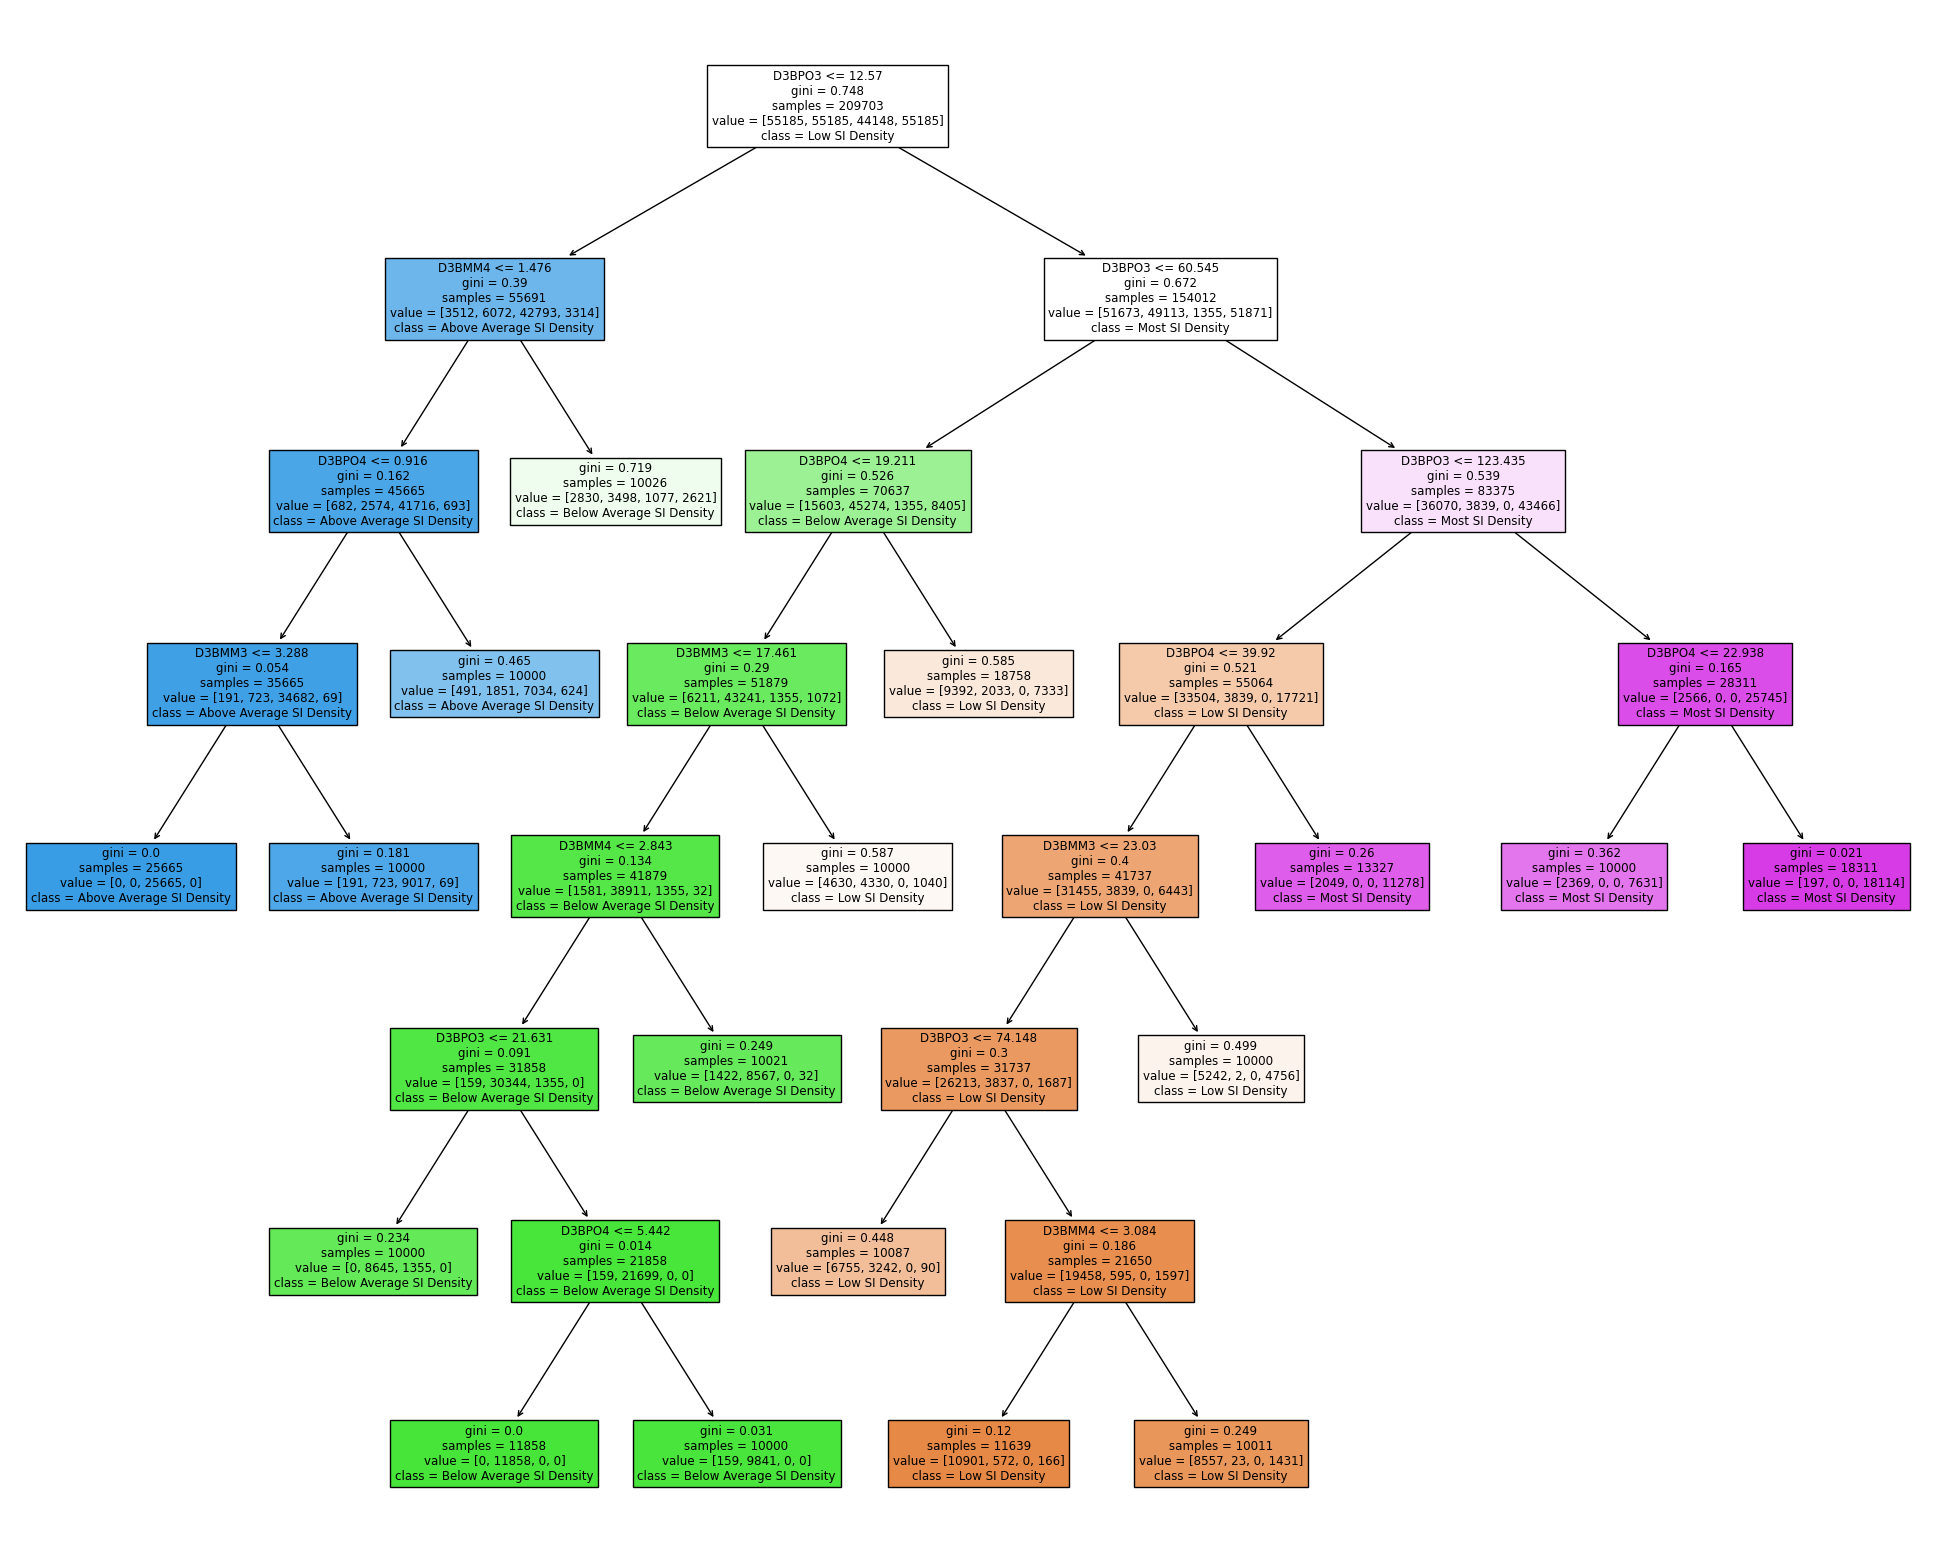

In [238]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=feature_cols,  class_names=names, filled=True)
fig.savefig("decision_tree1.png")

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)